In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
     

In [2]:
sheet_names = pd.ExcelFile("/Users/apple/Downloads/Assingment_Dataset.xlsx").sheet_names
sheet_names

['Geospatial Data',
 'Satellite Details',
 'News Reports',
 'Historical Incidents']

In [3]:
News_Reports= pd.read_excel("/Users/apple/Downloads/Assingment_Dataset.xlsx", sheet_name='News Reports')
News_Reports.head()

,ID,Date,Source,Title,Summary
0,1,2024-03-01,National News A,Border Tensions Increase,Rising tensions between Country A and Country ...
1,2,2024-03-03,International Times,New Military Installations Spotted,Satellite images reveal new military installat...
2,3,2024-03-05,Global Security,Diplomatic Talks Stalled,Diplomatic talks between Country A and Country...
3,4,2024-03-07,Border Watch,Escalation in Border Incidents,Reports indicate an increase in cross-border i...
4,5,2024-03-09,Defense News,Troop Movement Observed,Significant troop movements observed along the...


In [4]:
News_Reports.size

150

In [5]:
News_Reports.columns

Index(['ID', 'Date', 'Source', 'Title', 'Summary'], dtype='object')

In [6]:
News_Reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ID       30 non-null     int64         
 1   Date     30 non-null     datetime64[ns]
 2   Source   30 non-null     object        
 3   Title    30 non-null     object        
 4   Summary  30 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.3+ KB


In [7]:
News_Reports.describe()

,ID
count,30.000000
mean,15.500000
std,8.803408
min,1.000000
25%,8.250000
50%,15.500000
75%,22.750000
max,30.000000


In [8]:
News_Reports.isnull().sum()

ID         0
Date       0
Source     0
Title      0
Summary    0
dtype: int64

In [9]:
geospatial_data= pd.read_excel("/Users/apple/Downloads/Assingment_Dataset.xlsx", sheet_name='Geospatial Data')
geospatial_data.head()

,ID,Timestamp,Latitude,Longitude,Location,Movement Type,Country
0,1,2024-03-01 07:15:00,28.7041,77.1025,Border Post Alpha,Entry,Country A
1,2,2024-03-02 12:30:00,28.7042,77.1030,Border Post Alpha,Exit,Country A
2,3,2024-03-05 08:15:00,28.7043,77.1032,Border Post Alpha,Entry,Country A
3,4,2024-03-07 10:00:00,28.7044,77.1035,Border Post Alpha,Exit,Country A
4,5,2024-03-09 14:45:00,28.7045,77.1038,Border Post Alpha,Entry,Country A


In [10]:
satellite_details= pd.read_excel("/Users/apple/Downloads/Assingment_Dataset.xlsx", sheet_name='Satellite Details')
satellite_details.head()

,Image ID,Date,Location,Description
0,1,2024-03-01,Border Post Alpha,High-resolution image showing vehicle movement
1,2,2024-03-03,Border Post Alpha,Image showing increased military presence
2,3,2024-03-05,Border Post Alpha,Image showing an empty area
3,4,2024-03-07,Border Post Alpha,Image showing troop withdrawal
4,5,2024-03-09,Border Post Alpha,Image showing new infrastructure developments


In [11]:
# Convert the date columns to datetime format
geospatial_data['Timestamp'] = pd.to_datetime(geospatial_data['Timestamp'])
satellite_details['Date'] = pd.to_datetime(satellite_details['Date'])
News_Reports['Date'] = pd.to_datetime(News_Reports['Date'])

In [12]:
print(geospatial_data.info())
print(satellite_details.info())
print(News_Reports.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             30 non-null     int64         
 1   Timestamp      30 non-null     datetime64[ns]
 2   Latitude       30 non-null     float64       
 3   Longitude      30 non-null     float64       
 4   Location       30 non-null     object        
 5   Movement Type  30 non-null     object        
 6   Country        30 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Image ID     30 non-null     int64         
 1   Date         30 non-null     datetime64[ns]
 2   Location     30 non-null     object        
 3   D

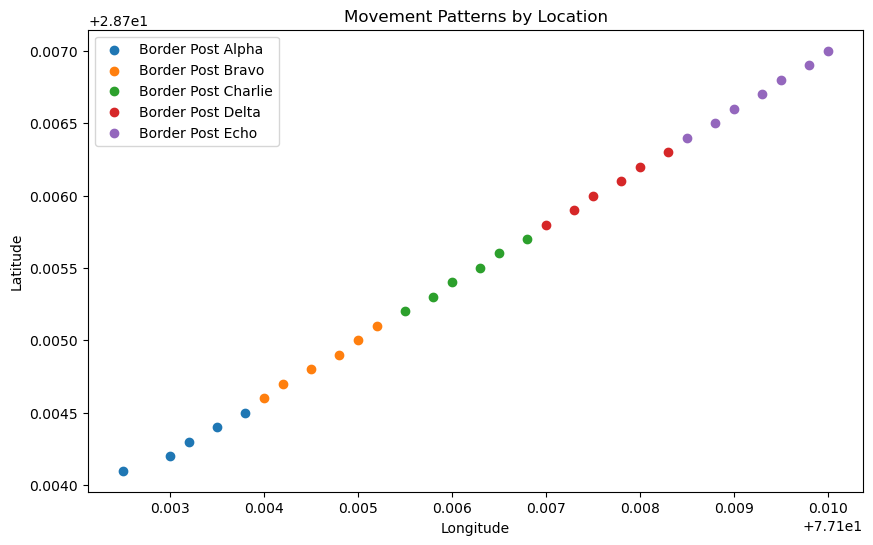

In [13]:
import matplotlib.pyplot as plt

# Plot movement patterns on a scatter plot
plt.figure(figsize=(10, 6))
for location in geospatial_data['Location'].unique():
    subset = geospatial_data[geospatial_data['Location'] == location]
    plt.scatter(subset['Longitude'], subset['Latitude'], label=location)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Movement Patterns by Location')
plt.legend()
plt.show()

In [14]:
# Merge geospatial data with satellite details on Date and Location
merged_data = pd.merge(geospatial_data, satellite_details, left_on=['Timestamp', 'Location'], right_on=['Date', 'Location'], how='left')

# Check the merged data
merged_data.head()

,ID,Timestamp,Latitude,Longitude,Location,Movement Type,Country,Image ID,Date,Description
0,1,2024-03-01 07:15:00,28.7041,77.1025,Border Post Alpha,Entry,Country A,NaN,NaT,NaN
1,2,2024-03-02 12:30:00,28.7042,77.1030,Border Post Alpha,Exit,Country A,NaN,NaT,NaN
2,3,2024-03-05 08:15:00,28.7043,77.1032,Border Post Alpha,Entry,Country A,NaN,NaT,NaN
3,4,2024-03-07 10:00:00,28.7044,77.1035,Border Post Alpha,Exit,Country A,NaN,NaT,NaN
4,5,2024-03-09 14:45:00,28.7045,77.1038,Border Post Alpha,Entry,Country A,NaN,NaT,NaN


In [15]:
# Merge the merged data with news reports on Date
final_data = pd.merge(merged_data, News_Reports, left_on='Timestamp', right_on='Date', how='left')

# Check the final merged data
final_data.head()


,ID_x,Timestamp,Latitude,Longitude,Location,Movement Type,Country,Image ID,Date_x,Description,ID_y,Date_y,Source,Title,Summary
0,1,2024-03-01 07:15:00,28.7041,77.1025,Border Post Alpha,Entry,Country A,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
1,2,2024-03-02 12:30:00,28.7042,77.1030,Border Post Alpha,Exit,Country A,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
2,3,2024-03-05 08:15:00,28.7043,77.1032,Border Post Alpha,Entry,Country A,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
3,4,2024-03-07 10:00:00,28.7044,77.1035,Border Post Alpha,Exit,Country A,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN
4,5,2024-03-09 14:45:00,28.7045,77.1038,Border Post Alpha,Entry,Country A,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN


In [16]:
# Group by location and count occurrences
location_analysis = final_data.groupby('Location').size().reset_index(name='Counts')
location_analysis

,Location,Counts
0,Border Post Alpha,5
1,Border Post Bravo,6
2,Border Post Charlie,6
3,Border Post Delta,6
4,Border Post Echo,7


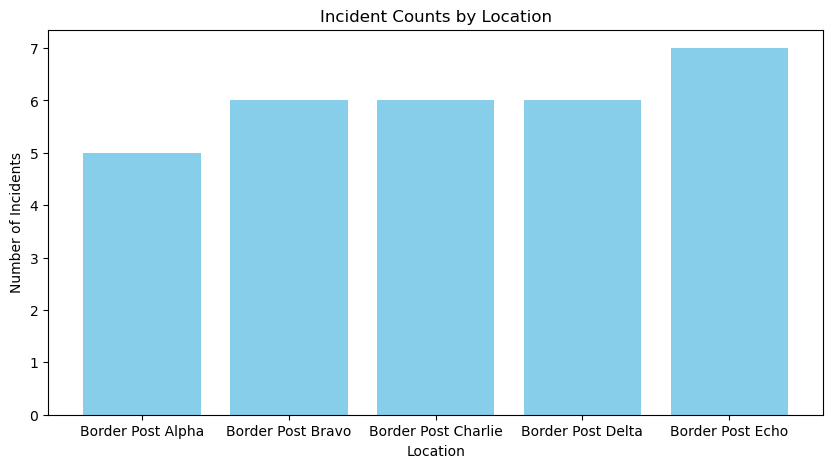

In [17]:
# Plot the counts by location
plt.figure(figsize=(10,5))
plt.bar(location_analysis['Location'], location_analysis['Counts'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Number of Incidents')
plt.title('Incident Counts by Location')
plt.show()

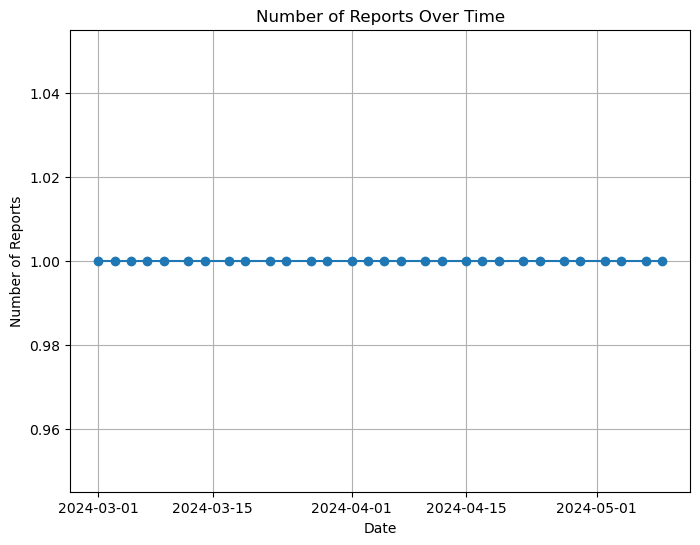

In [18]:
report_counts = News_Reports.groupby('Date').size()
plt.figure(figsize=(8, 6))
plt.plot(report_counts.index, report_counts.values, marker='o')
plt.title('Number of Reports Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.grid(True)
plt.show()